In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [167]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

In [168]:
train.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [170]:
train=train.drop(["PassengerId","Name","Ticket"],axis=1)

In [171]:
train['Deck'] = train['Cabin'].str[0]  
train['Deck'] = train['Deck'].fillna('U') 

In [172]:
train = pd.get_dummies(train, columns=['Deck'], drop_first=True)

In [173]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna('S')


In [174]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  891 non-null    object 
 9   Deck_B    891 non-null    bool   
 10  Deck_C    891 non-null    bool   
 11  Deck_D    891 non-null    bool   
 12  Deck_E    891 non-null    bool   
 13  Deck_F    891 non-null    bool   
 14  Deck_G    891 non-null    bool   
 15  Deck_T    891 non-null    bool   
 16  Deck_U    891 non-null    bool   
dtypes: bool(8), float64(2), int64(4), object(3)
memory usage: 69.7+ KB


In [175]:
train=pd.get_dummies(train, columns=["Sex","Embarked"],drop_first=True)

In [176]:
train=train.drop(["Cabin"],axis=1)

In [177]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,False,False,False,False,False,False,True,True,False,True
1,1,1,38.0,1,0,71.2833,False,True,False,False,False,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,False,False,False,False,False,True,False,False,True
3,1,1,35.0,1,0,53.1000,False,True,False,False,False,False,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,False,False,False,False,False,False,True,True,False,True


In [178]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [179]:
test['Deck'] = test['Cabin'].str[0]  
test['Deck'] = test['Deck'].fillna('U')

In [180]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Embarked'] = test['Embarked'].fillna('S')

In [181]:
test=test.drop([ "PassengerId","Name","Ticket","Cabin"],axis=1)

In [182]:
test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,male,34.5,0,0,7.8292,Q,U
1,3,female,47.0,1,0,7.0000,S,U
2,2,male,62.0,0,0,9.6875,Q,U


In [183]:
test=pd.get_dummies(test, columns=["Sex","Embarked","Deck"],drop_first=True)

In [184]:
test.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_U
0,3,34.5,0,0,7.8292,True,True,False,False,False,False,False,False,False,True
1,3,47.0,1,0,7.0000,False,False,True,False,False,False,False,False,False,True
2,2,62.0,0,0,9.6875,True,True,False,False,False,False,False,False,False,True


In [185]:
test.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        417 non-null    float64
 5   Sex_male    418 non-null    bool   
 6   Embarked_Q  418 non-null    bool   
 7   Embarked_S  418 non-null    bool   
 8   Deck_B      418 non-null    bool   
 9   Deck_C      418 non-null    bool   
 10  Deck_D      418 non-null    bool   
 11  Deck_E      418 non-null    bool   
 12  Deck_F      418 non-null    bool   
 13  Deck_G      418 non-null    bool   
 14  Deck_U      418 non-null    bool   
dtypes: bool(10), float64(2), int64(3)
memory usage: 20.5 KB


In [186]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,False,False,False,False,False,False,True,True,False,True
1,1,1,38.0,1,0,71.2833,False,True,False,False,False,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,False,False,False,False,False,True,False,False,True


In [187]:
x = train.drop("Survived", axis=1)  
y = train["Survived"]

In [188]:
print(x.shape)
print(y.shape)


(891, 16)
(891,)


In [189]:
x = x.fillna(x.median()) 

In [190]:
y = y[x.index]

In [191]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [192]:
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=5,
    min_samples_split=8,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42
)

model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8268156424581006

Accuracy: 0.8268156424581006
Precision: 0.8307692307692308
Recall: 0.7297297297297297
F1: 0.7769784172661871


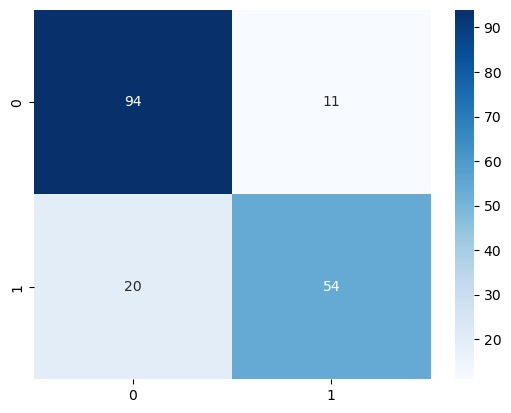

In [193]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [194]:
train_columns = x.columns

for col in train_columns:
    if col not in test.columns:
        test[col] = 0

test = test[train_columns]


In [195]:
submission = pd.DataFrame({
    "PassengerId": pd.read_csv("test.csv")["PassengerId"],
    "Survived": model.predict(test)  # modelin tahminleri
})

submission.to_csv("submission.csv", index=False)
